### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')


### Loading the dataset

In [2]:
df=pd.read_csv('baseball.csv') # loading the dataset and storing it into dataframe named df

In [3]:
df.shape

(30, 17)

Dataset contain 30 rows and 17 columns

In [4]:
df.size

510

Dataset has 510 number of elements

In [5]:
df.ndim
#It return the number of dimensions the dataframe have.

2

In [6]:
# Printing the first five rows of the dataframe.
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
# Printing the last 5 data points
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [8]:
# Lists all the 17 columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [9]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

All the columns have integer value except the Earned Run Average(ERA) Column have float value.
But all the columns have numerical value.

In [10]:
# Summarizing the dataset in statistic format
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
# Checking for the missing values in the dataset
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Looking at the above observation, there is no missing value in the dataset.

### Exploratory Data Anlysis(EDA)

#### Univariate Anaylsis

In [12]:
# Plotting the distribution plot for all columns

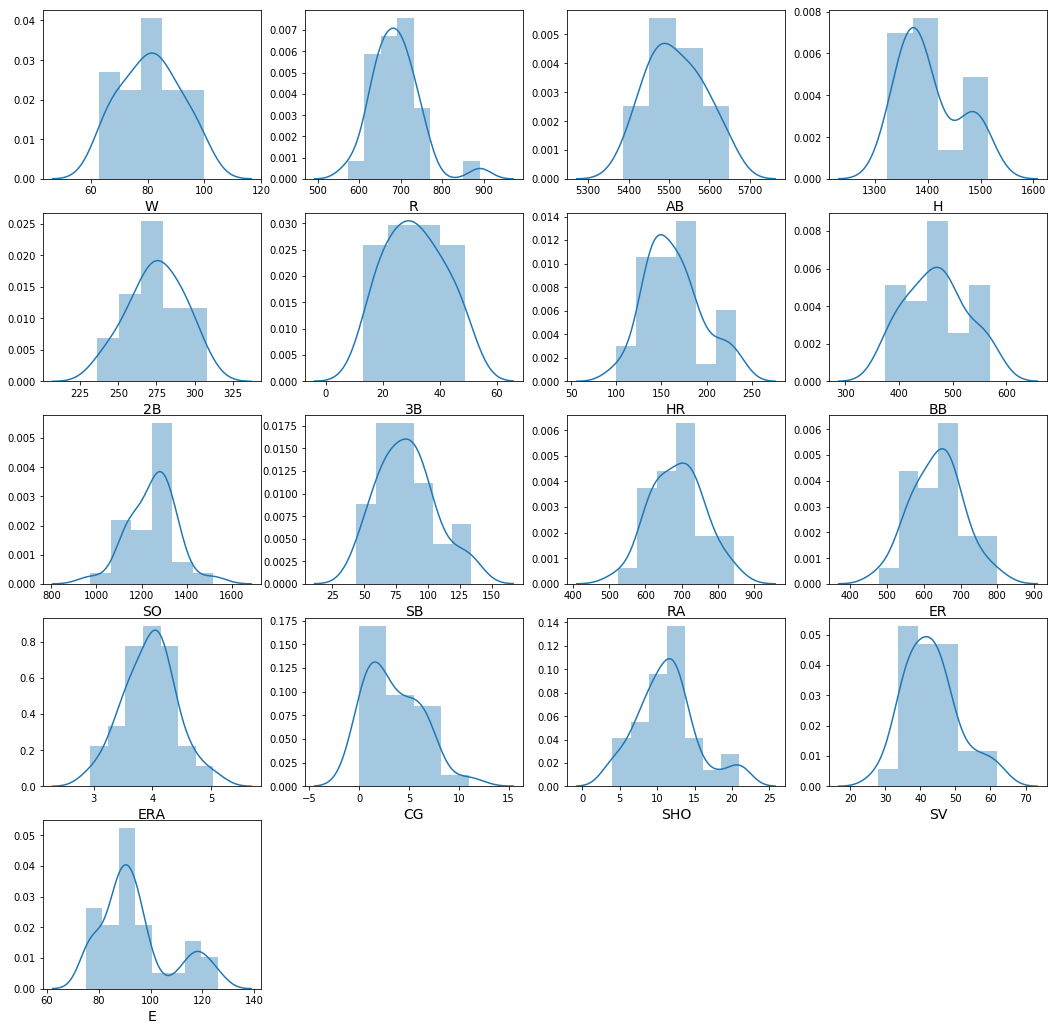

In [13]:
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sn.distplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

#### 1.The above graphs shows the distribution plot for columns in the dataframe.

#### 2. The Columns Runs_Scored(R),Hit(H),Home_Runs(HR),Strikeouts(SO),Complete_Games(CG),Shutouts(SHO) and Errors(E) are skewed from the mean.

#### 3. All the other columns shows normal distribution curve having mean approx to median.

#### 4. From Run_Score(R) and Errors(E) distribution graph outlier can be seen.

### Identifying the outliers

In [14]:
#Plotting the box plot for all columns

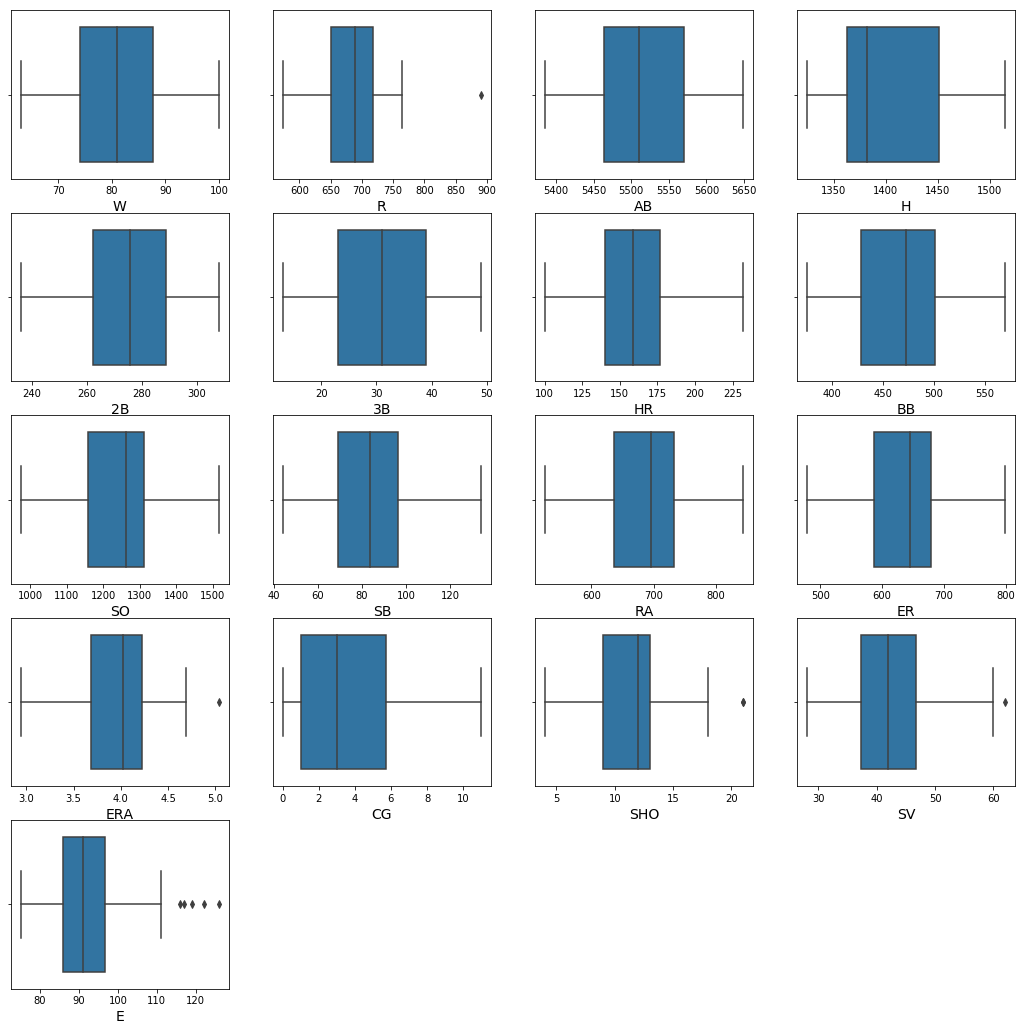

In [15]:
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sn.boxplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

#### The plot box situated above are representing the minimum value , maximum value and showing the mean value for the variables.

#### Outlier can be seen in Run_Scored(R),Earned_Run_Average(ERA),Shutouts(SHO),Saves(SV) and E(Errors) Columns.

In [16]:
#Plotting histogram for some of the features

Text(0.5, 0, 'Number of Winnigs')

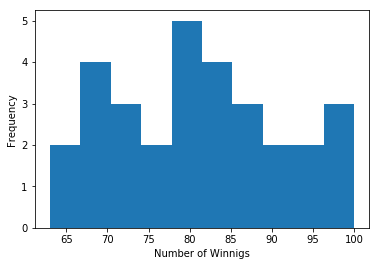

In [17]:
df['W'].plot.hist()
plt.xlabel('Number of Winnigs')

Text(0.5, 0, 'Homerun By Batters')

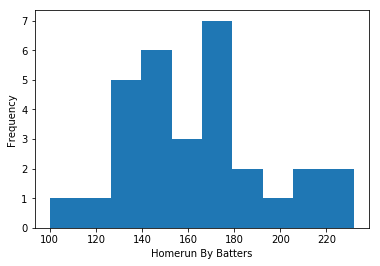

In [18]:
df['HR'].plot.hist()
plt.xlabel('Homerun By Batters')

Text(0.5, 0, 'Run Scored')

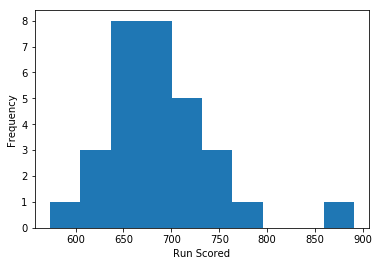

In [19]:
df['R'].plot.hist()
plt.xlabel('Run Scored')

Text(0.5, 0, 'Opponents Run Scored')

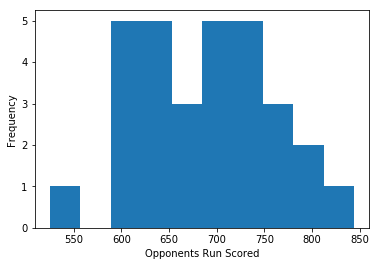

In [20]:
df['RA'].plot.hist()
plt.xlabel('Opponents Run Scored')

### Bivariate Analysis 

#### Plotting scatter plot between the target variable winnings and 16 different features.

In [21]:
features=df.iloc[:,1:]

In [22]:
features.shape

(30, 16)

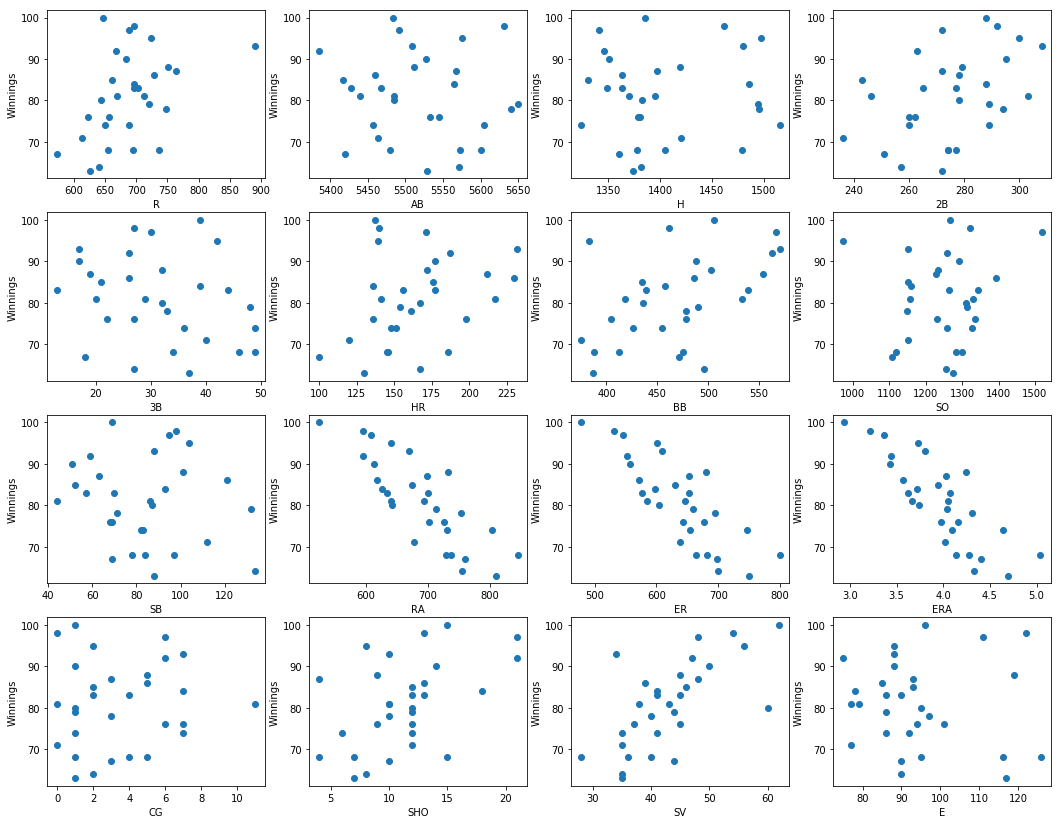

In [23]:
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for column in features:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        plt.scatter(features[column],df['W'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Winnings')
    plotnumber=plotnumber+1
plt.show()

- Scatter plot shows the positive or negative correlation between Winnings and 16 Features 

- Runs(R),Home Runs(HR),Walks by batters(BB), Strikeouts(SO) and Saves(Sv) are postively correlated with the Winning.
- Opponent run scored(RA),Earned Run Scored(ER) and Earned Run Avrage(ERA) are negatively correlated with winning variable,when   the value RA is decreases the number of winnigs are increases. 

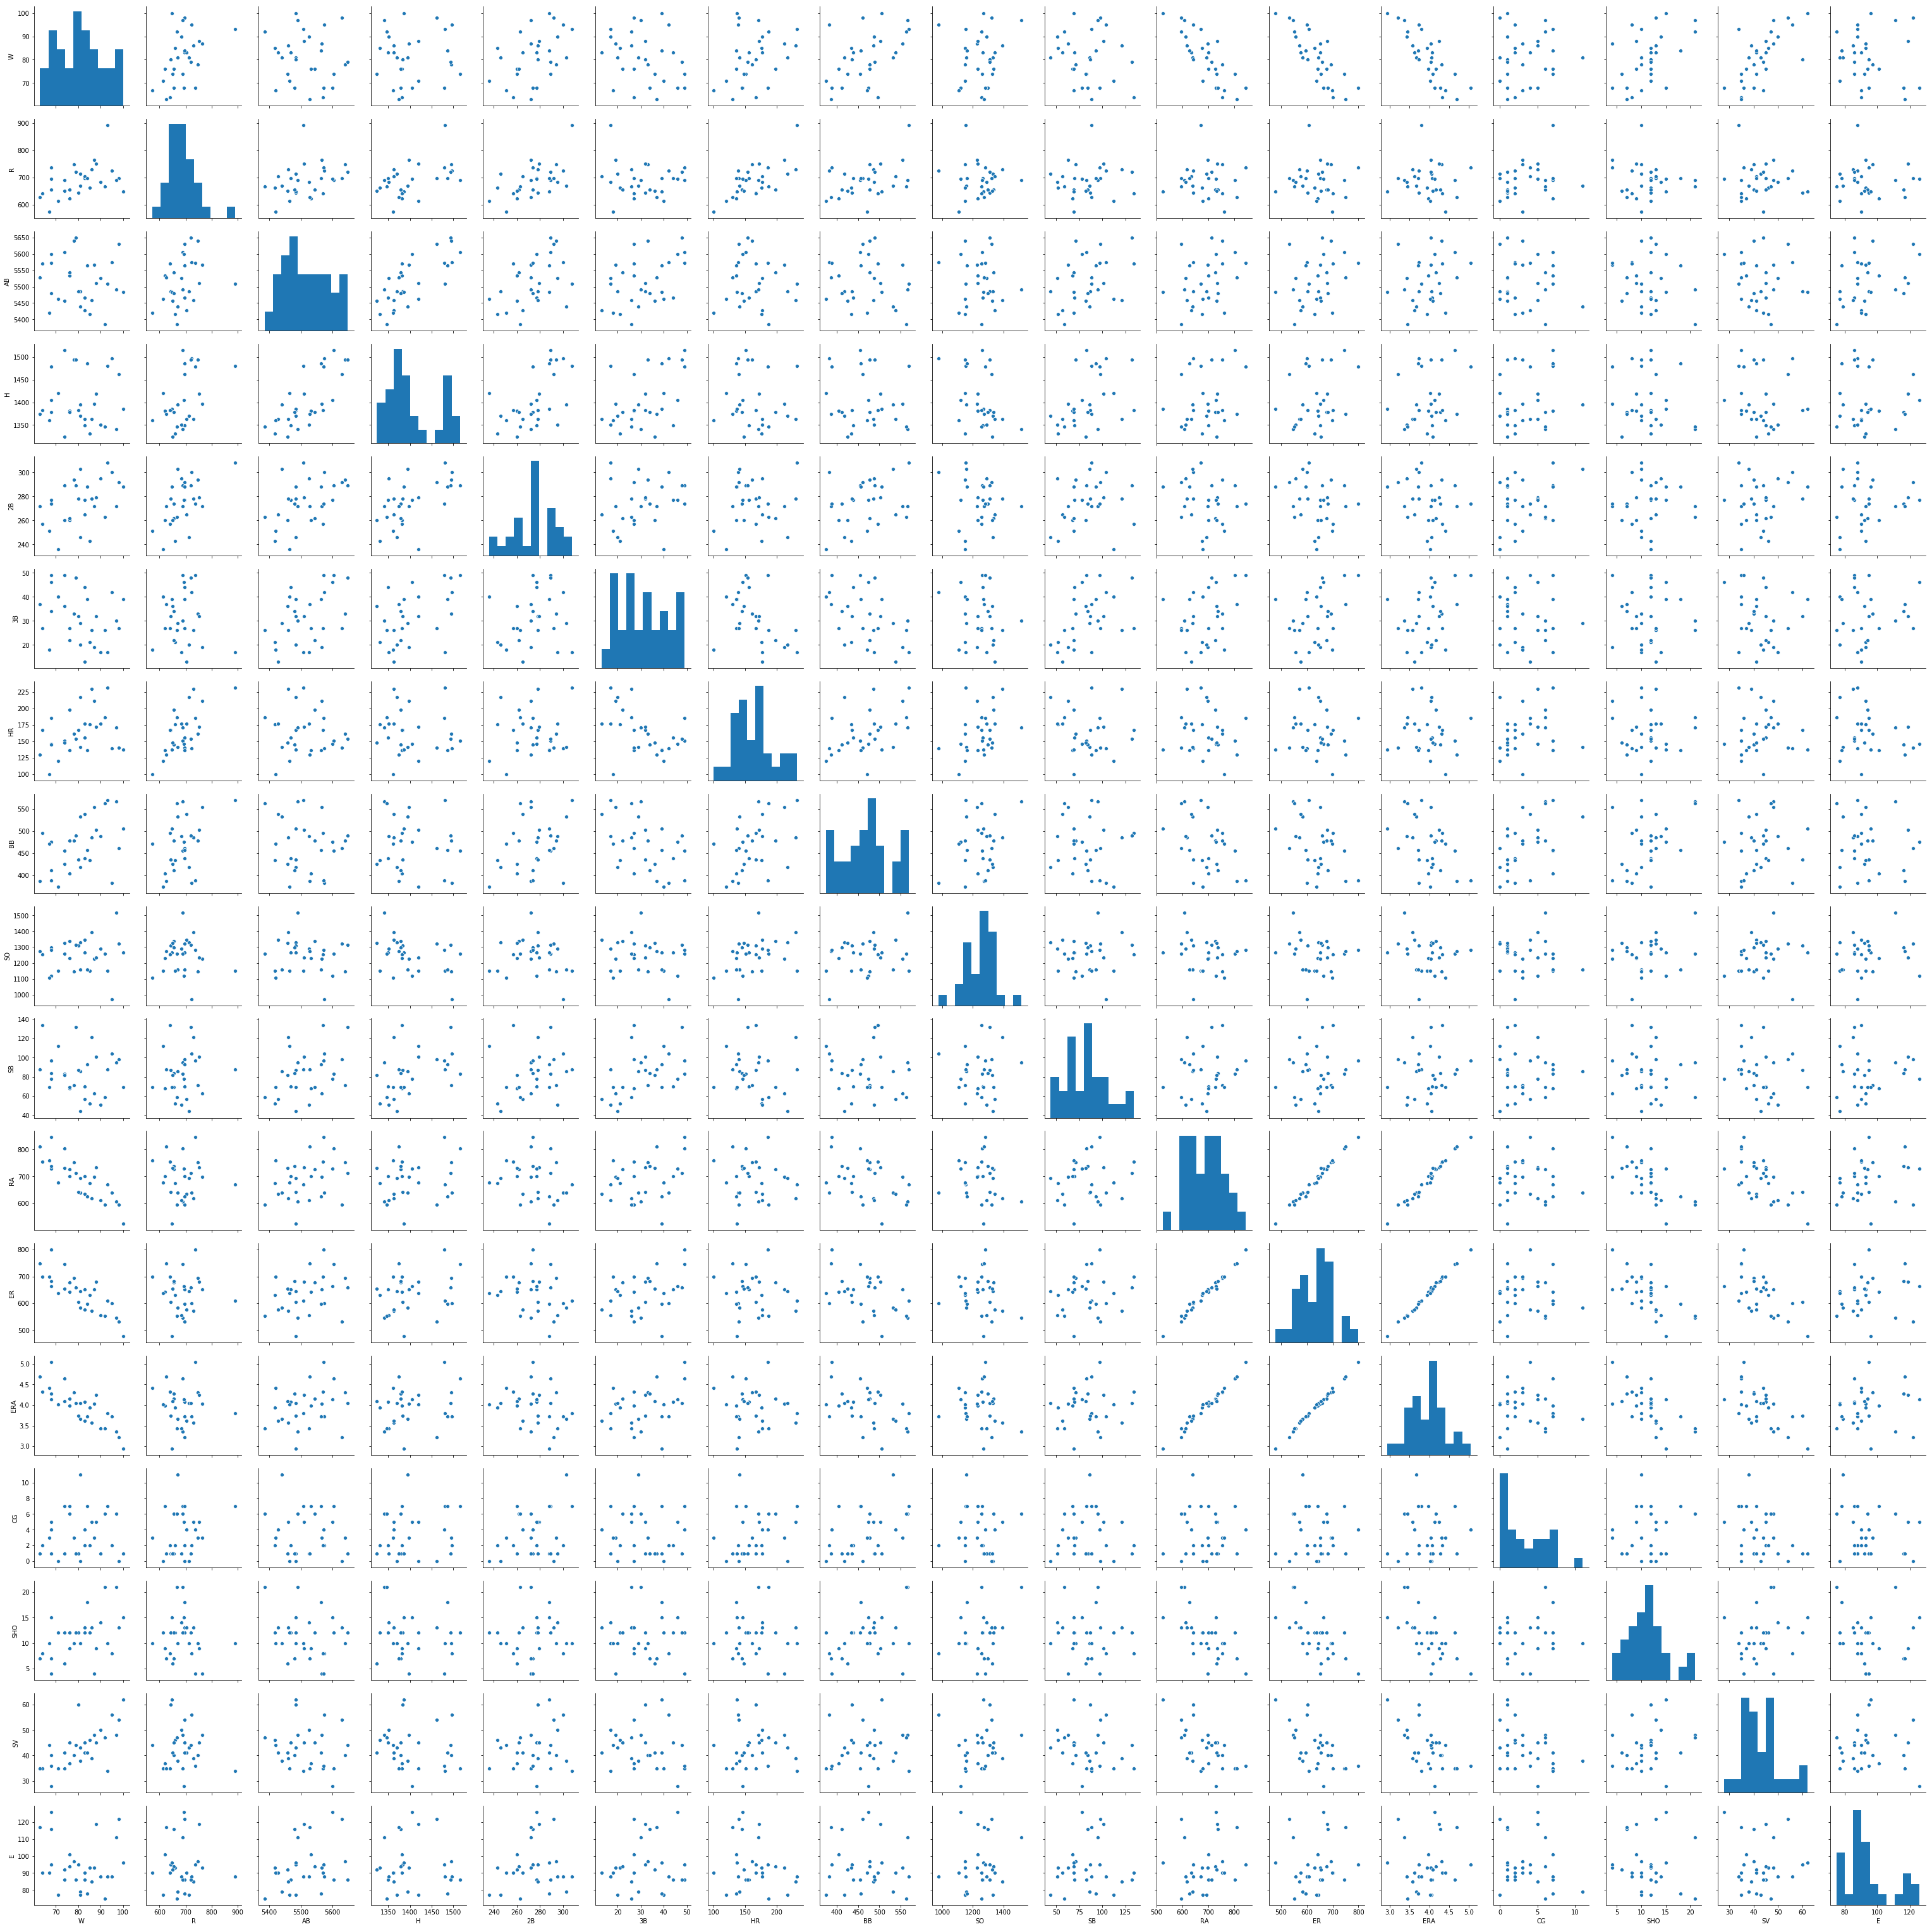

In [24]:
sn.pairplot(df)

The above pairplot shows that the distribution of each variables and also shows the relationship between each of the two varible,shows '/' line forming on graph shows positive correlation where as '\' line shows negative correlation.
Variables such as Stolen Bases(SB),Oppoenets run scored(RA),and Earned runs allowed(ER) are Positively correlated with each other in comparision to other variables.

### Multivariate anaylsis

In [25]:
#Finding the correlation values
cor=df.corr()
cor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


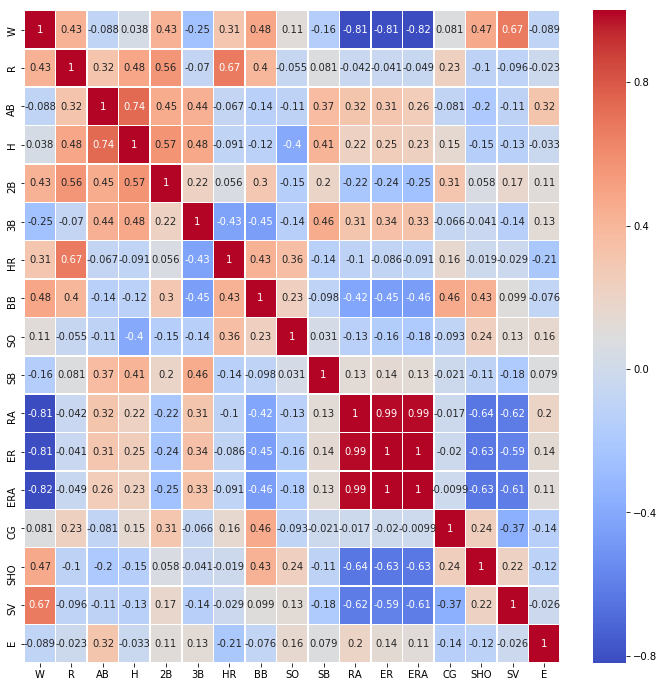

In [26]:
#Plotting heatmap
corr_matrix=df.corr()
fig, axis = plt.subplots(figsize=(12, 12))
sn.heatmap(corr_matrix,annot=True,linewidths=.5,cmap='coolwarm')

- ERA,RA and ER are negatively correlated with the target variable winnings.
- SV is very positively correlated with the Winnings.
- CG and Homerun features shows no correlation with winnnings at all.

In [27]:
cor['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

### Data Preprocessing : Removing the outliers

In [28]:
# Removing the outliers of the data using Z_Score method
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3).all(axis=1)]

In [29]:
new_df.shape

(29, 17)

In [30]:
df.shape

(30, 17)

In [31]:
# Data loss percentage
Data_loss=(30-29)/30*100
Data_loss


3.3333333333333335

After removing the outliers from the data the shape of the data has change from 30,17 to 29,17 which shows that with the z score we are able to remove 1 row resulting into loss of data of only 3.3% so it is feasible to use Z_Score.

### Checking for Skewness

In [32]:
# Check for skewness range
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

#### Using log transformation technique

In [33]:
# We will use log transformation technique to remove the skewness
new_df['H'] =np.log1p(new_df['H'])
new_df['CG'] =np.log1p(new_df['CG'])
new_df['SHO'] =np.log1p(new_df['SHO'])
new_df['SV'] =np.log1p(new_df['SV'])
new_df['E']=np.log1p(new_df['E'])

In [34]:
new_df.skew()
# Now all feature are in acceptable range

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO   -0.598073
SV     0.109983
E      0.586101
dtype: float64

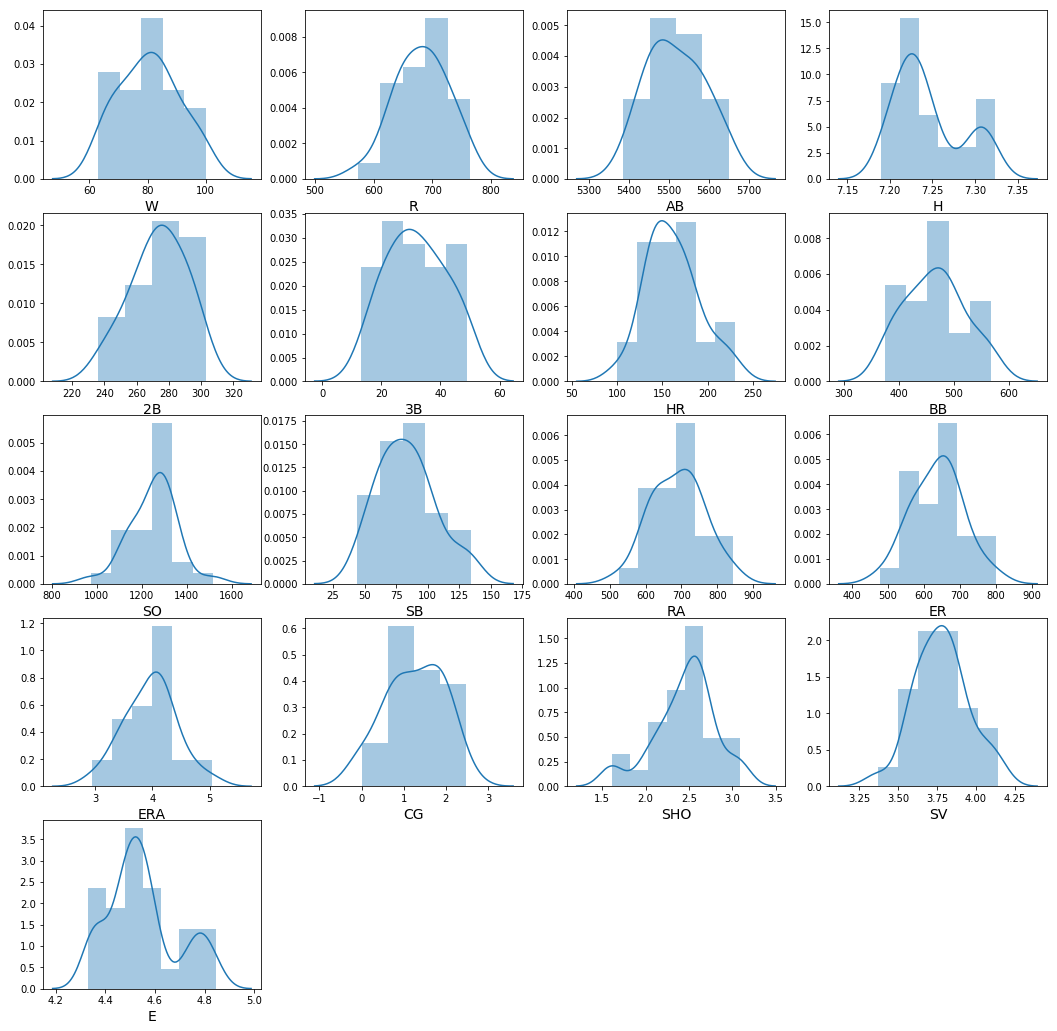

In [35]:
# Plotting the distribution plot
plt.figure(figsize=(18,18),facecolor='white')
plotnumber=1
for column in new_df:
    if plotnumber<=17:
        ax=plt.subplot(5,4,plotnumber)
        sn.distplot(new_df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

- From the above distribution plot we can see that now all the features have normal distribution curve or less skewed distribution so now outlier and skewness both are removed from the dataset.

### Splitting the data into dependent and independent variable

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x = new_df.drop(['W'], axis = 1)
y = new_df.iloc[:,0:1]

In [37]:
print(x.shape)
x.head()

(29, 16)


,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,2.197225,4.043051,4.488636
1,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,2.564949,3.828641,4.465908
2,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,2.397895,3.663562,4.382027
3,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,2.302585,3.637586,4.624973
4,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,2.564949,3.583519,4.465908


In [38]:
print(y.shape)
y.head()

(29, 1)


,W
0,95
1,83
2,81
3,76
4,74


In [39]:
# Splitting the data into training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Standard Scaler

In [40]:
# peforming standard scaling method since every column having value on different scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Finding the best random state

In [41]:
from sklearn.linear_model import LinearRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best R2_score is",MaxAccu,'on random state',maxRS)

Best R2_score is 0.9417729162955015 on random state 106


In [42]:
# Splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=maxRS)

### Applying different models on the dataset

In [44]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR(kernel = 'rbf')
SR.fit(x, y)
y_pred=SR.predict(x_test)
svr_score=r2_score(y_test,y_pred)
print("R2 score from Support Vector regression is",svr_score)
svr_cv=cross_val_score(SR,x,y,scoring='r2',cv=5).mean()
svr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',svr_mae)
svr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',svr_mse)
print("Cross validation score is ",svr_cv)

R2 score from Support Vector regression is 0.12403054448871198
Mean absolute error :  11.211111111111109
Mean Squared error : 146.57888888888886
Cross validation score is  -0.45074500599448486


In [45]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.9417729162955015
Mean absolute error :  2.626880386796074
Mean Squared error : 9.743332006552743
Cross validation score is  -0.01688990979015803


In [46]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(x, y)
y_pred=neigh.predict(x_test)
knn_score=r2_score(y_test,y_pred)
print("R2 score from K Nearest Neighbors regression is",knn_score)
knn_cv=cross_val_score(neigh,x,y,scoring='r2',cv=5).mean()
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)
knn_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',knn_mse)
print("Cross validation score is ",knn_cv)

R2 score from K Nearest Neighbors regression is 0.9071215139442231
Mean absolute error :  3.75
Mean Squared error : 15.541666666666666
Cross validation score is  -0.39869848202683256


In [47]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor(n_estimators=20, random_state=106)
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score)
rfr_cv=cross_val_score(RFR,x,y,scoring='r2',cv=5).mean()
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)
rfr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',rfr_mse)
print("Cross validation score is ",rfr_cv)

R2 score from Random Forest regression is 0.5922609561752988
Mean absolute error :  7.883333333333333
Mean Squared error : 68.22833333333332
Cross validation score is  -0.5406853829434677


In [48]:
model=['Support Vector Regressor','Linear Regression','K Nearest Neighbors','Random Forest Regressor']

acc=[svr_score*100,lr_score*100,knn_score*100,rfr_score*100]
mae=[svr_mae,lr_mae,knn_mae,rfr_mae]
cv_score=[svr_cv*100,lr_cv*100,knn_cv*100,rfr_cv*100]

result=pd.DataFrame({'Model':model,'R2_score':acc,'MAE':mae,'cv_score':cv_score})
result
# Creting dataframe to store R2_score,Mae and cv score of all the models.

,Model,R2_score,MAE,cv_score
0,Support Vector Regressor,12.403054,11.211111,-45.074501
1,Linear Regression,94.177292,2.626880,-1.688991
2,K Nearest Neighbors,90.712151,3.750000,-39.869848
3,Random Forest Regressor,59.226096,7.883333,-54.068538


### Chossing the model

- Choosing Linear Regression model becauase it has highest R2_score of 94.17 more than any other model and least MAE score of 2.62.

### Applying hyperparameter tuning to best model

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
#Linear Regression
parameters={'fit_intercept':[True,False],
               'normalize':[True,False],
               'copy_X':[True,False],
                'n_jobs':[1,2,3,4,5,6]
           }

In [51]:
GCV=GridSearchCV(LinearRegression(),parameters,cv=5)

In [52]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False], 'n_jobs': [1, 2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
# After tuning the parameter it provides the best parameter values
GCV.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

### Creating the final model

In [59]:
Final_model=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)
Final_model.fit(x_train,y_train)
y_pred=Final_model.predict(x_test)
acc=r2_score(y_test,y_pred)
print("R2 Score of the model is ",acc*100)
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)

R2 Score of the model is  94.17729162955015
Mean absolute error :  2.626880386796074


### Saving the model

In [55]:
from sklearn.externals import joblib

In [56]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']

In [57]:
mod=joblib.load('Final_Model.pkl')

In [58]:
print(mod.predict(x_test))

[[78.94027929]
 [66.08860467]
 [72.88117411]
 [65.92683102]
 [89.98012428]
 [96.06461112]]
